In [2]:
#########################
### all_Q_means with time ###
########################## 
import matplotlib.pyplot as plt
import numpy as np

# 初始化字典来存储各组的平均值和标准误
Q_means = {}
Q_SEM = {}

groups = ['0.3', '0.35', '0.37', '0.4', '0.45', '0.5']

for group in groups:
    # 初始化列表来存储每个重复实验的平均值
    group_means = []
    for i in range(9):
        n = i + 1
        # 加载数据文件
        data = np.loadtxt(f'/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Kleisin_interaction_test/replica/analysis/Q_mean/{group}_latch/colvar{n}', comments=['@', '#'])
        # 计算并存储该重复实验的平均值
        group_means.append(np.mean(data[:99999, 1]))
    
    # 计算该组的总体平均值和标准误
    Q_means[group] = np.mean(group_means)
    Q_SEM[group] = np.std(group_means, ddof=1) / np.sqrt(len(group_means))

# 提取平均值和标准误作为作图数据
mean_values = [Q_means[group] for group in groups]
sem_values = [Q_SEM[group] for group in groups]

/tmp/ipykernel_3908868/1886029493.py:54: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(numerical_groups[i], mean_values[i], yerr=sem_values[i], fmt='o',


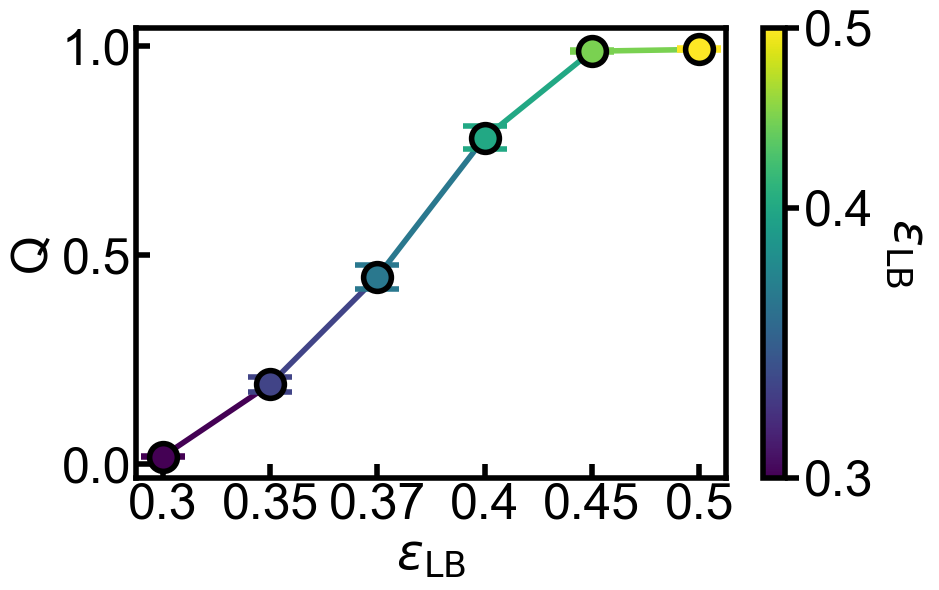

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.collections import LineCollection

# 更新绘图风格
plt.rcParams.update({
    'font.family': 'Arial',  # 设置字体
    'axes.titlesize': 36,  # 标题字体大小
    'axes.labelsize': 36,  # 坐标轴标签字体大小
    'xtick.labelsize': 36,  # X轴刻度字体大小
    'ytick.labelsize': 36,  # Y轴刻度字体大小
    'legend.fontsize': 36,  # 图例字体大小
    'figure.figsize': (9.5, 6),  # 图像大小
    'axes.linewidth': 4,  # 坐标轴线宽
    'xtick.major.size': 10, # x 轴主刻度长度
    'ytick.major.size': 10, # y 轴主刻度长度
    'xtick.minor.size': 5, # x 轴次刻度长度
    'ytick.minor.size': 5, # y 轴主刻度长度
    'xtick.major.width': 4, # x 轴主刻度线宽
    'ytick.major.width': 4, # y 轴主刻度线宽
    'xtick.minor.width': 4, # x 轴次刻度线宽
    'ytick.minor.width': 4, # y 轴主刻度线宽
    'legend.fontsize': 28,    # 图例字体大小
    'axes.grid': False,  # 关闭背景网格
})

# Step 1: Assign numerical values to labels
unique_labels = sorted(set(groups))
label_to_num = {label: idx for idx, label in enumerate(unique_labels)}

# Step 2: Map labels to numerical indices
numerical_groups = np.array([label_to_num[label] for label in groups])

# Step 3: Normalize and map colors
cmap = plt.get_cmap('viridis')
norm = mcolors.Normalize(vmin=min(numerical_groups), vmax=max(numerical_groups))
colors = [cmap(norm(value)) for value in numerical_groups]

fig, ax = plt.subplots()

# Create line segments for gradient effect
points = np.array([numerical_groups, mean_values]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create a LineCollection from the segments
lc = LineCollection(segments, colors=colors[:-1], linewidths=4)

# Add the LineCollection to the plot
ax.add_collection(lc)

# Step 4: Plot with error bars
for i in range(len(groups)):
    ax.errorbar(numerical_groups[i], mean_values[i], yerr=sem_values[i], fmt='o',
                linewidth=4, capsize=16, capthick=20, ecolor=colors[i],
                color=colors[i], marker='o', markersize=20,
                markerfacecolor=colors[i], markeredgewidth=4, markeredgecolor='black')

# Label the axes
ax.set_xlabel(r'$\epsilon_\text{LB}$')
ax.set_ylabel('Q')

# x 轴刻度朝内
plt.tick_params(axis='x', which='both', direction='in')
# y 轴刻度朝内
plt.tick_params(axis='y', which='both', direction='in')

# Set x-ticks to the numerical values and label them with the original groups
ax.set_xticks(numerical_groups)
ax.set_xticklabels(groups)
plt.yticks(np.arange(0, 1.1, 0.5),rotation=0)

# Create a ScalarMappable for the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # This line is necessary for the colorbar to work

# Add colorbar with matching styling
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label(r'$\epsilon_\text{LB}$', fontsize=36, rotation=270, labelpad=40)

# Only show 0.3, 0.4, 0.5 on the colorbar
selected_labels = ['0.3', '0.4', '0.5']
selected_indices = [label_to_num[label] for label in selected_labels if label in label_to_num]
cbar.set_ticks(selected_indices)
cbar.set_ticklabels([selected_labels[i] for i, idx in enumerate(selected_indices) if idx in selected_indices])

# Match colorbar tick style with main plot
cbar.ax.tick_params(width=4, length=10, labelsize=36, direction='out')

plt.tight_layout()
plt.savefig("all_Q_mean.png", dpi=300, bbox_inches='tight')
plt.show()